In [3]:
import numpy as np
import pandas as pd

调整数据类型，使文件占用更少的内存

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
sample_feature = reduce_mem_usage(pd.read_csv('data/data_for_tree.csv'))

Memory usage of dataframe is 62099672.00 MB
Memory usage after optimization is: 16520303.00 MB
Decreased by 73.4%


In [6]:
sample_feature.shape

(199037, 39)

In [7]:
sample_feature.head()

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,used_time,city,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,4384.0,1.0,10192.0,35990.0,13.0,1800.0,36457520.0,4564.0,3576.0,5.0
1,1,2.0,1,0.0,0.0,15.0,40.0,2262,-,0,...,4756.0,4.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,NaN
2,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,4384.0,2.0,1458.0,45000.0,100.0,8496.0,14373814.0,5424.0,9848.0,16.0
3,3,0.0,10,0.0,1.0,15.0,109.0,71865,0.0,0,...,7124.0,NaN,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,19.0
4,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,1531.0,6.0,4664.0,31500.0,20.0,2300.0,15414322.0,3344.0,3306.0,6.0


In [8]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price','brand','model','brand']]

In [10]:
continuous_feature_names

['SaleID',
 'bodyType',
 'fuelType',
 'gearbox',
 'kilometer',
 'name',
 'notRepairedDamage',
 'offerType',
 'power',
 'seller',
 'train',
 'v_0',
 'v_1',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'used_time',
 'city',
 'brand_amount',
 'brand_price_max',
 'brand_price_min',
 'brand_price_median',
 'brand_price_sum',
 'brand_price_std',
 'brand_price_average',
 'power_bin']

In [11]:
sample_feature.head().append(sample_feature.tail())

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,used_time,city,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,4384.0,1.0,10192.0,35990.0,13.0,1800.0,36457520.0,4564.0,3576.0,5.0
1,1,2.0,1,0.0,0.0,15.0,40.0,2262,-,0,...,4756.0,4.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,NaN
2,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,4384.0,2.0,1458.0,45000.0,100.0,8496.0,14373814.0,5424.0,9848.0,16.0
3,3,0.0,10,0.0,1.0,15.0,109.0,71865,0.0,0,...,7124.0,NaN,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,19.0
4,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,1531.0,6.0,4664.0,31500.0,20.0,2300.0,15414322.0,3344.0,3306.0,6.0
199032,199995,4.0,4,0.0,0.0,15.0,4.0,20903,0.0,0,...,7260.0,3.0,16576.0,99999.0,12.0,6000.0,138279072.0,8088.0,8344.0,11.0
199033,199996,0.0,0,0.0,0.0,15.0,0.0,708,0.0,0,...,6016.0,1.0,31424.0,68500.0,13.0,3200.0,173719696.0,6260.0,5528.0,7.0
199034,199997,0.0,1,1.0,1.0,15.0,49.0,6693,0.0,0,...,4344.0,3.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,22.0
199035,199998,0.0,1,0.0,1.0,15.0,27.0,96900,0.0,0,...,NaN,1.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,NaN
199036,199999,1.0,6,NaN,1.0,9.0,166.0,193384,0.0,0,...,4152.0,3.0,10192.0,35990.0,13.0,1800.0,36457520.0,4564.0,3576.0,6.0


In [12]:
#删除带有nan的行，替换'-'，删除index
sample_feature = sample_feature.dropna().replace('-',0).reset_index(drop=True)

行数明显减少了

In [13]:
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)
sample_feature['notRepairedDamage'].value_counts()

0.0    83608
1.0     8121
Name: notRepairedDamage, dtype: int64

In [14]:
train = sample_feature[continuous_feature_names + ['price']]

In [15]:
train_x = train[continuous_feature_names]
train_y = train['price']

简单建模

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression(normalize=True)
model = model.fit(train_x,train_y)

In [18]:
'intercept' + str(model.intercept_)

'intercept-110670.68277136872'

In [19]:
from matplotlib import pyplot as plt

In [20]:
#设置50个随机数
subsample_index = np.random.randint(low=0,high=len(train_y),size=50)
subsample_index

array([35373, 67942,  6167, 77011, 87072,  8310, 64219, 37509, 54447,
       32223, 62187,  2332, 15697, 52350, 17852, 63911, 25853, 32311,
       84004, 11781,  9393, 48363, 57639, 86133, 14382,  6159, 87407,
       37764, 62118,  4130, 38031, 49466, 68026, 14066, 10415,  2053,
       91502, 78158, 26359, 51332,   383,  9136, 90258, 64568,  9433,
       84919, 76006, 89672, 40931, 11475])

Text(0, 0.5, 'price')

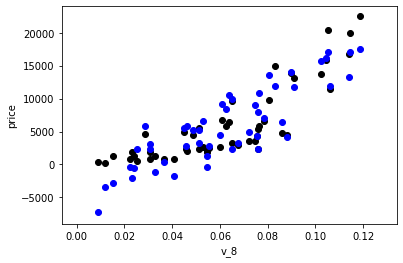

In [21]:
#绘制v_9的真实值与预测值
plt.scatter(train_x['v_8'][subsample_index],train_y[subsample_index],color='black')
plt.scatter(train_x['v_8'][subsample_index],model.predict(train_x.loc[subsample_index]),color='blue')
plt.xlabel('v_8')
plt.ylabel('price')

可以看出，预测值和真实值的差距有一些大，还有一些预测值小于0

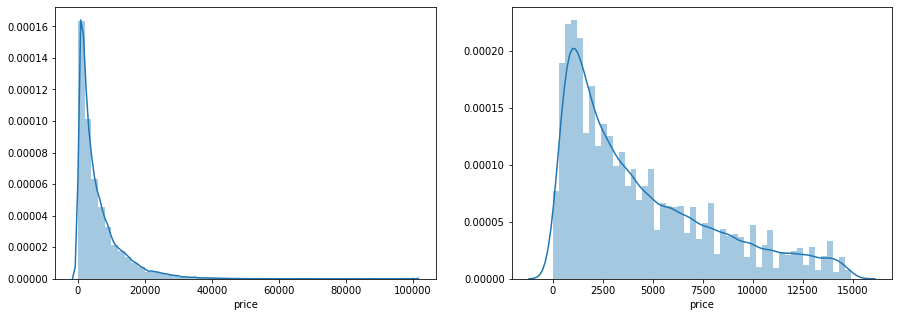

In [22]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y)
plt.subplot(1,2,2)
sns.distplot(train_y[train_y<np.quantile(train_y,0.9)])

在这里我们对标签进行了log(x+1)变换，使标签贴近于正态分布

In [23]:
train_y_ln = np.log(train_y + 1)
train_y_ln

0        7.523481
1        8.736007
2        8.556606
3        8.987322
4        8.160804
           ...   
91724    9.601098
91725    8.682877
91726    9.159152
91727    8.922792
91728    8.517193
Name: price, Length: 91729, dtype: float64

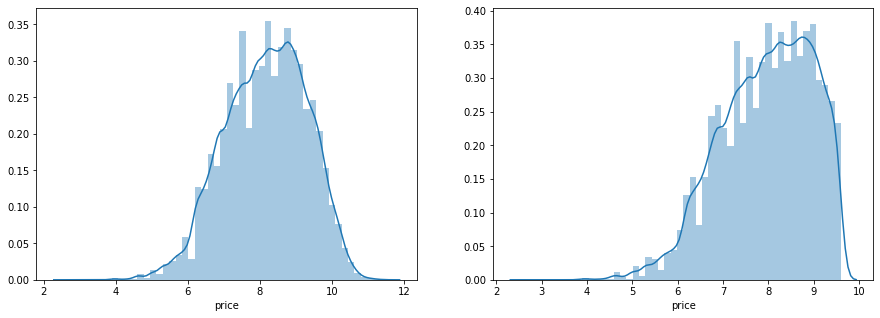

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train_y_ln)
plt.subplot(1,2,2)
sns.distplot(train_y_ln[train_y_ln<np.quantile(train_y_ln,0.9)])

此时train_y_ln比较符合正态分布

In [25]:
model = model.fit(train_x,train_y_ln)

Text(0, 0.5, 'price')

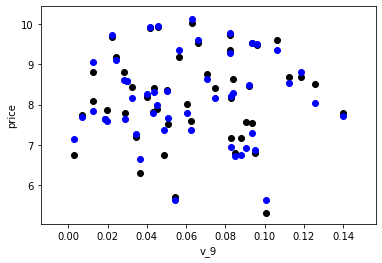

In [26]:
#绘制v_9的真实值与预测值
plt.scatter(train_x['v_9'][subsample_index],train_y_ln[subsample_index],color='black')
plt.scatter(train_x['v_9'][subsample_index],model.predict(train_x.loc[subsample_index]),color='blue')
plt.xlabel('v_9')
plt.ylabel('price')

五折交叉验证

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,make_scorer

In [29]:
def log_transfer(func):
    def wrapper(y, yhat):
        result = func(np.log(y), np.nan_to_num(np.log(yhat)))
        return result
    return wrapper

In [32]:
# scores = cross_val_score(model,train_x,train_y,cv=5)

In [33]:
# scores

In [30]:
scores = cross_val_score(model,train_x,train_y,verbose=1,cv=5,scoring=make_scorer(log_transfer(mean_absolute_error)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda-install\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda-install\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda-install\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda-install\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda-install\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipy

In [31]:
scores

array([1.3483038 , 1.36349007, 1.38071244, 1.37840113, 1.35810452])

In [34]:
print('AVG:',np.mean(scores))

AVG: 1.3658023920313904


In [46]:
scores = cross_val_score(model,train_x,train_y_ln,verbose=1,cv=5,scoring=make_scorer(mean_absolute_error))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


In [47]:
scores

array([0.19079177, 0.19375821, 0.194132  , 0.19182523, 0.19575788])

In [48]:
print('AVG:', np.mean(scores))

AVG: 0.19325301837047454


In [52]:
# scores = pd.DataFrame(scores.reshape(1,-1))
scores.columns = ['cv' + str(x) for x in range(1,6)]
scores.index = ['MAE']

In [53]:
scores

,cv1,cv2,cv3,cv4,cv5
MAE,0.190792,0.193758,0.194132,0.191825,0.195758


####

In [54]:
import datetime

In [55]:
sample_feature

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,used_time,city,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,4384.0,1.0,10192.0,35990.0,13.0,1800.0,36457520.0,4564.0,3576.0,5.0
1,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,4384.0,2.0,1458.0,45000.0,100.0,8496.0,14373814.0,5424.0,9848.0,16.0
2,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,1531.0,6.0,4664.0,31500.0,20.0,2300.0,15414322.0,3344.0,3306.0,6.0
3,5,0.0,10,1.0,0.0,10.0,24.0,137642,0.0,0,...,2482.0,3.0,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,10.0
4,6,0.0,4,0.0,1.0,15.0,13.0,2402,0.0,0,...,6184.0,3.0,16576.0,99999.0,12.0,6000.0,138279072.0,8088.0,8344.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91724,149994,1.0,1,0.0,0.0,3.0,42.0,43073,0.0,0,...,1538.0,5.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,12.0
91725,149995,4.0,10,0.0,1.0,15.0,121.0,163978,0.0,0,...,5772.0,4.0,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,16.0
91726,149996,0.0,11,0.0,0.0,10.0,116.0,184535,0.0,0,...,2322.0,2.0,2944.0,34500.0,30.0,2900.0,13398006.0,4724.0,4548.0,12.0
91727,149997,1.0,11,1.0,0.0,6.0,60.0,147587,0.0,0,...,2003.0,3.0,2944.0,34500.0,30.0,2900.0,13398006.0,4724.0,4548.0,8.0


In [56]:
sample_feature = sample_feature.reset_index(drop=True)

In [57]:
sample_feature

,SaleID,bodyType,brand,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,...,used_time,city,brand_amount,brand_price_max,brand_price_min,brand_price_median,brand_price_sum,brand_price_std,brand_price_average,power_bin
0,0,1.0,6,0.0,0.0,12.5,30.0,736,0.0,0,...,4384.0,1.0,10192.0,35990.0,13.0,1800.0,36457520.0,4564.0,3576.0,5.0
1,2,1.0,15,0.0,0.0,12.5,115.0,14874,0.0,0,...,4384.0,2.0,1458.0,45000.0,100.0,8496.0,14373814.0,5424.0,9848.0,16.0
2,4,1.0,5,0.0,0.0,5.0,110.0,111080,0.0,0,...,1531.0,6.0,4664.0,31500.0,20.0,2300.0,15414322.0,3344.0,3306.0,6.0
3,5,0.0,10,1.0,0.0,10.0,24.0,137642,0.0,0,...,2482.0,3.0,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,10.0
4,6,0.0,4,0.0,1.0,15.0,13.0,2402,0.0,0,...,6184.0,3.0,16576.0,99999.0,12.0,6000.0,138279072.0,8088.0,8344.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91724,149994,1.0,1,0.0,0.0,3.0,42.0,43073,0.0,0,...,1538.0,5.0,13656.0,84000.0,15.0,6400.0,124044600.0,8992.0,9080.0,12.0
91725,149995,4.0,10,0.0,1.0,15.0,121.0,163978,0.0,0,...,5772.0,4.0,13992.0,92900.0,15.0,5200.0,113034208.0,8248.0,8076.0,16.0
91726,149996,0.0,11,0.0,0.0,10.0,116.0,184535,0.0,0,...,2322.0,2.0,2944.0,34500.0,30.0,2900.0,13398006.0,4724.0,4548.0,12.0
91727,149997,1.0,11,1.0,0.0,6.0,60.0,147587,0.0,0,...,2003.0,3.0,2944.0,34500.0,30.0,2900.0,13398006.0,4724.0,4548.0,8.0


选取时间靠前的4/5作为训练集,1/5作为验证机

In [58]:
split_point = len(sample_feature) // 5 * 4

In [59]:
train = sample_feature.loc[:split_point].dropna()
val = sample_feature.loc[split_point:].dropna()
train_x = train[continuous_feature_names]
train_y_ln = np.log(train['price'] + 1)
val_x = val[continuous_feature_names]
val_y_ln = np.log(val['price'] + 1)

In [60]:
model = model.fit(train_x,train_y_ln)

In [61]:
mean_absolute_error(val_y_ln,model.predict(val_x))

0.1957766727030103

绘制学习率曲线和验证曲线